<a href="https://colab.research.google.com/github/thecrazyphysicist369/strategic-Covid19-testing/blob/main/v2_Targeted_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid Lockdown Project
This project tries to answer what is the effect of lockdown in a given population in a **Watts-Strogatz Small World Network**. 
Also is a lockdown at all necessary to curb the spread of the virus?

#Run this cell


In [ ]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

This is the new model which considers the amount and the order of infection. This also considers the parameters and virus spreading more like real world. The *Contamination Level* for each individual is the amount of virus they are exposed to.

1. 1 < *Cont_level* < 25 : Susceptible
2. 26 < *Cont_level* < 50 : Exposed
3. 51 < *Cont_level* < 75 : Infected
4. 76 < *Cont_level* : Recovered

#Run this cell

In [ ]:
#vertex generator generates each individual with their properties
def gen_vertex(n):
    ver_list=[]
    c=0

    for i in range(n):
      vertex = {
                'index': c, 			# the unique index of the voter
                'cont_level' : 0, # a positive number that increases everytime the
                                  #individual meets another with covid.
                'connected': []   # the small world connections between the individuals
                }
      ver_list.append(vertex)
      c+=1
    return ver_list

#Generating the Small World Network
def gen_graph(n, k, p):
   population = gen_vertex(n)
   G = nx.watts_strogatz_graph(n, k, p, seed=10)
   neighbor = []
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))
   	neighbor.append(neighbours)
   for i in range(n):
     population[i]['connected'] = neighbor[i]
     population[i]['index'] = int(i)
     population[i]['cont_level'] = random.randint(0, 15)
   return population

#this is to expose n individuals from the population to the virus
#1/5th of the exposed individuals will be infected in random
def expose_population(n, population):
  inf_list = []
  limit = len(population)-1
  for i in range(n):
    index = random.randint(0, limit)
    inf_list.append(index)
    population[index]['cont_level'] = random.randint(25, 30) 
  return population, inf_list

#targeted testing
def targeted_testing(pop, tpm, list_i): #pop = population; tpm = tests per million
  numbers = len(pop) # total population
  test = int((tpm * numbers)/1000000) # number of tests that is needed to be done
  infected = len(list_i)
  test_i = int((infected * test) / numbers)
  for i in range (test_i): 
    index = list_i[random.randint(0, infected - 1)]
    if pop[index]['cont_level'] <= 150 and pop[index]['cont_level'] > 25:
      pop[index]['cont_level'] = -10
  return pop

#Death function
def death(pop, infected):
  for i in range(random.randint(0, int(len(infected)/100))):
    index = infected[i]
    pop[index]['cont_level']=151
  return pop

#Recovery
def recovery(pop, infected):
  for i in range(random.randint(0, int(len(infected)/10))):
    index = infected[i]
    pop[index]['cont_level']=-10
  return pop



#Contamination function
def contaminate(a, b):
  if a > 0 and a <= 130:
    new = a + math.log10(b)
  else:
    new = a
  return new

def progress_bar(est, elas):
  perc=(elas/est)*10
  perc=int(perc)
  rem=10-perc
  print('[','#'*perc,' '*rem,']', ' ',perc*10, '%')

In [ ]:
gen_graph(100,3,0.3)


#Run this cell

In [ ]:
def days(pop, tpm):
  list_S = [] #list for Susceptible Individuals
  list_E = [] #list for Exposed Individuals
  list_I = [] #list for Infected Individuals
  list_R = [] #list for Recovered Individuals
  list_D = [] #list for Dead Individuals

  #Adding person to the respective lists based on their status
  #compartmening the population
  for person in pop:
    level = person['cont_level']
    if level >= 0 and level <= 25:
      list_S.append(person['index'])
    elif level > 25 and level <= 65:
      list_E.append(person['index'])
    elif level > 65 and level <=150:
      list_I.append(person['index'])
    elif level > 150:
      list_D.append(person['index'])
    elif level==-10:
      list_R.append(person['index'])


  #Infecting 1/5th of exposed population
  ex_num = len(list_E)
  num = int(ex_num/5)
  for i in range(num):
    r = random.randint(0,ex_num-1)
    list_I.append(list_E[r])
    list_E.pop(r)
    ex_num = len(list_E)


  #Spreading the Virus
  for i in list_I:
    friends = pop[i]['connected']  
    for contacts in friends:
      A = pop[contacts]['cont_level'] #is consuming
      B = pop[i]['cont_level'] #is spreading
      pop[contacts]['cont_level'] = contaminate(A, B)  #write a good fucntion here

  

  #Removing the duplicates from the list
  list_S = list(dict.fromkeys(list_S))
  list_E = list(dict.fromkeys(list_E))
  list_I = list(dict.fromkeys(list_I))
  list_R = list(dict.fromkeys(list_R))
  list_D = list(dict.fromkeys(list_D))

  #testing the population
  pop = targeted_testing(pop, tpm, list_I)
  pop = recovery(pop, list_I)
  pop = death(pop, list_I)


  return (pop, list_S, list_E, list_I, list_R, list_D)

#Execute this if you want to run the simulation with input values.

Doing  0 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  0.38 secs
Doing  1 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  0.97 secs
Doing  2 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  1.43 secs
Doing  3 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  1.80 secs
Doing  4 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  2.12 secs
Doing  5 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  2.48 secs
Doing  6 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  2.84 secs
Doing  7 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  3.27 secs
Doing  8 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  3.72 secs
Doing  9 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  4.16 secs
Doing  10 th iteration. Time : 0.00 secs. Elapsed time : 0.00 secs. Estimated :  4.76 secs
Doing  11

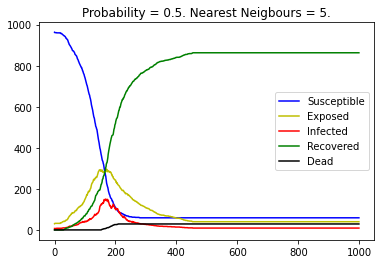

In [ ]:

population_size = 1000000 #fixed 1 million

k = 5 #int(input("\nk nearest neighbors : ")) 

p = 0.5 #float(input("\nProbablity of the contacts : "))

tpm = 10000 #int(input("\nTests per million population : "))

iterations = 1000 #int(input("\nNumber of days the model to run : "))

ex = 50 #int(input("\nNumber of Individuals initially exposed"))


#Generating the small world network
population = gen_graph( population_size, k, p)

#Exposing the population
#li is the list of the first round of exposed population
population,li = expose_population(ex, population)


#Number of days the simulation need to run
count = np.arange(iterations)


# List to contain the current data
susp = []
expo = []
infe = []
reco = []
dead = []


elapsed = 0
# Running the days simulation for given number of days
for j in range (iterations):
	inter = []
	tic = time.time()
	population, sus, exp, inf, rec, ded = days(population, tpm)
	susp.append(len(sus)) #Count of suspected persons per day
	expo.append(len(exp)) #Count of exposed persons per day
	infe.append(len(inf)) #Count of infected persons per day
	reco.append(len(rec)) #Count of recovered persons per day
	dead.append(len(ded))
	toc = time.time()
	one_day = toc - tic
	elapsed += one_day  
	estimated = elapsed*(iterations-j)
	remaining = (iterations * one_day) - (j * one_day)
	#progress_bar(estimated, elapsed)
	print("Doing ",j,"th iteration. Time :","{:.2f}".format(one_day),
	      "secs. Elapsed time :","{:.2f}".format(elapsed),"secs. Estimated : ","{:.2f}".format(estimated),"secs")


plt.plot(count, susp, color='b', label = "Susceptible")
plt.plot(count, expo, color='y', label = "Exposed")
plt.plot(count, infe, color='r', label = "Infected")
plt.plot(count, reco, color='g', label = "Recovered")
plt.plot(count, dead, color='k', label = "Dead")
label = "Probability = "+str(p)+". Nearest Neigbours = "+str(k)+"."
plt.title(label, fontdict=None, loc='center', pad=None)
plt.legend()
plt.show()


#Execute this if you want to run the simulation with sliders.

In [ ]:
pop = widgets.IntSlider(value=5000, 
                      description='population size', 
                      max=100000, 
                      min=10000,
                      step=10000) #population_size
k = widgets.IntSlider(value=10, 
                      description='nearest neighbors', 
                      max=100, 
                      min=0,
                      step=5) #nearest neighbor
p = widgets.FloatSlider(value=0.5,
                        description='probability', 
                        max=1, 
                        min=0, 
                        step=0.1) #probability
iter = widgets.IntSlider(value=100, 
                               description='days', 
                               max=600, 
                               min=0, 
                               step=20)
tpm = widgets.IntSlider(value=1000,
                        description='test per million',
                        max=100000,
                        min=1000,
                        step=1000)
ex = widgets.IntSlider(value=50,
                       description='initial exposed',
                       max=500,
                       min=10,
                       step=10)


def simulation(pop,k,p,iter,tpm,ex):
    #Generating the small world network
    population = gen_graph(pop, k, p)

    #Exposing the population
    #li is the list of the first round of exposed population
    population,li = expose_population(ex, population)


    #Number of days the simulation need to run
    count = np.arange(iter)


    # List to contain the current data
    susp = []
    expo = []
    infe = []
    reco = []
    dead = []


    elapsed = 0
    # Running the days simulation for given number of days
    for j in range (iter):
      inter = []
      tic = time.time()
      population, sus, exp, inf, rec, ded = days(population, tpm)
      susp.append(len(sus)) #Count of suspected persons per day
      expo.append(len(exp)) #Count of exposed persons per day
      infe.append(len(inf)) #Count of infected persons per day
      reco.append(len(rec)) #Count of recovered persons per day
      dead.append(len(ded))
      toc = time.time()
      one_day = toc - tic
      elapsed += one_day
      estimated = elapsed*(iter-j)
      remaining = (iter * one_day) - (j * one_day)
      #print("Doing ",j,"th iteration. Time :","{:.2f}".format(one_day),
       #     "secs. Elapsed time :","{:.2f}".format(elapsed),"secs. Remaining : ","{:.2f}".format(remaining),"secs")
    #progress_bar(estimated,elapsed)
    
    plt.figure(figsize=(20,10))
    plt.plot(count, susp, color='b', label = "Susceptible")
    plt.plot(count, expo, color='y', label = "Exposed")
    plt.plot(count, infe, color='r', label = "Infected")
    plt.plot(count, reco, color='g', label = "Recovered")
    plt.plot(count, dead, color='k', label = "Dead")
    label = "Probability = "+str(p)+". Nearest Neigbours = "+str(k)+"."
    plt.title(label, fontdict=None, loc='center', pad=None)
    plt.legend()
    return()
ui = widgets.HBox([pop,k,p,iter,tpm,ex])
out = widgets.interactive_output(simulation, {'pop':pop,'k':k,'p':p,'iter':iter,'tpm':tpm,'ex':ex})

display(ui, out)

Output()